<a href="https://colab.research.google.com/github/dpshepherd/PHY452_F2023/blob/main/PHY452_F24_convolution_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [52]:
def conv1D(x,b,p=0) -> np.ndarray:
  """1D convolution function

  Parameters
  ----------
  x: ndarray
    input vector
  b: ndarray
    filter
  p: int
    padding

  Returns
  -------
  y: ndarray
    output vector
  """

  assert len(b) <= len(x), "signal should be bigger than kernel"
  assert p>=0, "padding must positive integer"

  b_rotated = np.array(b[::-1])

  # apply zero padding if p is greater than zero
  if p> 0:
    x_padded = np.concatenate((np.zeros(p), x, np.zeros(p)))
  else:
    x_padded = x

  # make an empty output array
  output = []

  # iterate over the array and apply the kernel
  for i in range(len(x_padded)-len(b)+1):
    output.append(np.sum(x_padded[i:i+b_rotated.shape[0]] * b_rotated))

  return np.array(output[0:len(x)])


In [49]:
# comb function with L = 5 and height = 1
x = [0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0]
# boxcar with width = L/2 = 4/2 = 2
b = [0,1,1,0]

In [53]:
# calculate the 1D convolution of the comb and boxcar
our_result = conv1D(x,b,2)

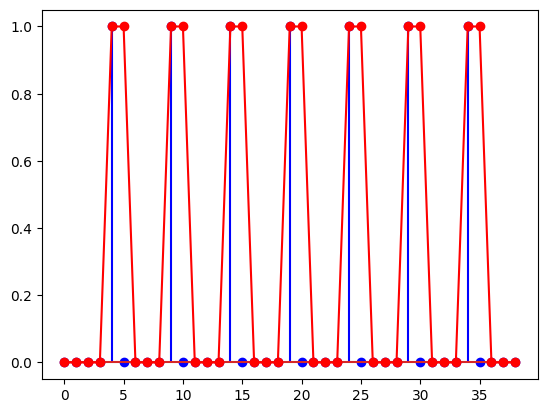

In [71]:
# import plotting libraries
from matplotlib import pyplot as plt

# plot input signal and convolved signal
x_axis = np.arange(len(x))
plt.figure()
plt.stem(x_axis,x,"bo")
plt.plot(x_axis,our_result,"ro-")
plt.show()

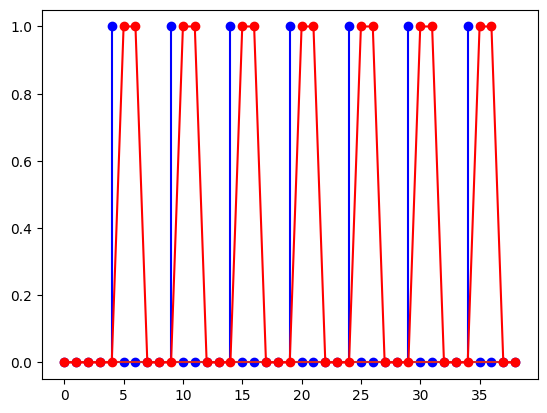

In [73]:
def conv1D_FFT(x, b):
  """1D convolution function using FFT

  Parameters
  ----------
  x: ndarray
    input vector
  b: ndarray
    filter

  Returns
  -------
  y: ndarray
    output vector
  """

  # calculate the FFT of the input and filter
  x_fft = np.fft.fft(x)
  b_fft = np.fft.fft(b,n=len(x))

  # perform element-wise multiplication in the frequency domain
  y_fft = x_fft * b_fft

  # take the inverse FFT to get the result in the time domain
  y = np.fft.ifft(y_fft)

  return np.real(y)

# calculate the 1D convolution of the comb and boxcar using FFT
y_fft = conv1D_FFT(x, b)

# plot input signal and convolved signal using FFT
plt.figure()
plt.stem(x_axis,x,"bo")
plt.plot(x_axis,y_fft,"ro-")
plt.show()

Why are the boxcar centers shifted compared to the real space convolution? Look up the properties of the discrete fourier transform in the numpy documentation.